### Project about How to Tell a Story Using Data

   I’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so I and my partners decide to try to attract investors. They’re interested in the current market conditions—will we be able to maintain your success when the novelty of robot waiters wears off?
   
   I’am an analytics guru, so my partners have asked me to prepare some market research. I have open-source data on restaurants in LA.

## Description of the data

object_name — establishment name

chain — chain establishment (TRUE/FALSE)

object_type — establishment type

address — address

number — number of seats


                         Step 1. Download the data and prepare it for analysis

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
!pip install usaddress
import usaddress


     -------------------------------------- 63.9/63.9 kB 866.2 kB/s eta 0:00:00
     -------------------------------------- 155.5/155.5 kB 2.3 MB/s eta 0:00:00


In [4]:
try:
    df=pd.read_csv('/datasets/rest_data_us.csv') 
except:
    df=pd.read_csv('C:/Projects/datasets/rest_data_us.csv')

   Let's have a look at our data. 

In [5]:
df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


   We have 6 columns that contain information about an id of the restaurant, it's name, address, the information does the object belong to a chain, it's type and number of seats. There are 9651 rows in our data.
   There are  3 missing values in column 'chain'. These 3 restaurants are unique, there are no objects with the same name, so we can make an assumption that they should have "False" in chain column. Additionally we changed the data type for column 'chain' from object to bool. 

In [5]:
df['chain']=df['chain'].astype(bool)

In [6]:
df['chain'].unique()

array([False,  True])

In [7]:
nan=df[df['chain'].isnull()]
nan

,id,object_name,address,chain,object_type,number


In [8]:
t=df[df['object_name']=='TAQUERIA LOS 3 CARNALES']
t

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,True,Restaurant,14


In [9]:
l=df[df['object_name']=='THE LEXINGTON THEATER']
l

,id,object_name,address,chain,object_type,number
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,True,Restaurant,35


In [10]:
jammin=df[df['object_name']=='JAMMIN JIMMY\'S PIZZA']
jammin        

,id,object_name,address,chain,object_type,number
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,True,Pizza,1


In [12]:
df['chain']=df['chain'].fillna(False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


Let's check the information about number of the seats.  

In [6]:
df['number'].unique()

array([ 26,   9,  20,  22,  14, 100,   7,   1,  35,  38,  17, 133,  18,
        21, 147,  10, 139, 103,  16,  39,   4,  43,  48,  19,  80,  31,
        15,   5, 118, 182,  49,  13,  37, 158,  45,  33,  28,   8,  27,
         2, 184,  24,  66,  11, 112,  40,  25,  29, 122,   3, 219,  63,
       121, 163,   6,  88,  75, 131,  42,  32, 128, 224,  36,  12, 200,
       205,  71,  23, 107, 134,  73,  62, 140,  79,  70, 225, 149,  44,
       221, 157,  34, 123, 138, 116, 108,  85,  41, 155,  46,  77, 111,
       143,  96, 146,  97, 129, 124, 130,  91, 109,  81,  69, 117,  47,
       167, 209, 217, 185, 135, 164, 162, 113,  89, 151, 196, 127,  84,
       115,  86, 190,  92, 148,  98, 227, 141, 197, 145, 229, 213, 222,
        64,  95, 101, 208, 102,  61,  65, 166, 170,  74, 187, 169, 119,
        99, 110, 104,  90, 186, 189, 142,  87, 171, 198, 136, 106, 203,
       210, 226,  82, 199,  67, 194,  68, 125, 126, 218, 180, 132, 212,
       161,  83, 193, 192, 181, 175, 204, 160, 174, 159, 144, 15

There are restaurants with just 1 seat. It is interesting, let's look at them.

In [14]:
df[df['number']<=1]


,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
35,11821,REGGIE'S DELI & CAFE,1910 W SUNSET BLVD STE 150,True,Restaurant,1
93,11879,TACOMIENDO,11462 GATEWAY BLVD,False,Fast Food,1
139,11925,KIKKA SUSHI,308 WESTWOOD PLZ # A233B,True,Restaurant,1
265,12051,LUCKY STRIKE HOLLYWOOD,6801 HOLLYWOOD BLVD STE #143,False,Restaurant,1
...,...,...,...,...,...,...
9562,21348,7-ELEVEN STORE #18778D,7600 W SUNSET BLVD,False,Restaurant,1
9566,21352,THE BUTLER'S KITCHEN,5616 E BEVERLY BLVD,False,Restaurant,1
9589,21375,WHITE AND BROWN,603 S MARIPOSA AVE,False,Restaurant,1
9600,21386,YAKITORI TEN,3470 W 6TH ST STE 2A,False,Restaurant,1


 There are 187 establishments with 0 or 1 place to sit. Perhabs it is take-away establishhments.

Let's check out data for duplicates.

In [ ]:
df.duplicated().sum()

There are any duplicates.

Now the data is ready for analysis.

                                    Step 2. Data analysis

Let's see what types of restaurants we have.

In [15]:
#Investigate the proportions of the various types of establishments. Plot a graph.
types = df.groupby(['object_type'])['id'].nunique().reset_index()
types=types.sort_values(by='id', ascending=False)
types

,object_type,id
5,Restaurant,7255
3,Fast Food,1066
2,Cafe,435
4,Pizza,320
1,Bar,292
0,Bakery,283


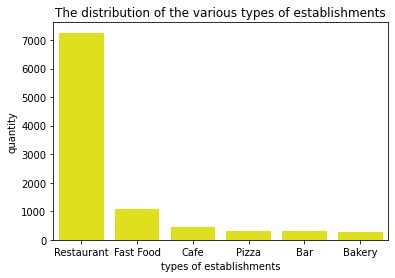

In [16]:
sns.barplot(x = 'object_type',
            y = 'id',
            data = types, color='yellow')
sns.set_palette('colorblind') 
sns.set_style('whitegrid') 
plt.title('The distribution of the various types of establishments')
plt.xlabel('types of establishments') 
plt.ylabel('quantity')


plt.show()

   Most establishments in our data are restaurants (7255 places or 75%), 1066 places or 11%- fast foods, 435 places or 5%- cafes. Pizza, bar and bakery - 3% each. It probably will be hard to open a restaurant and make it successful, so many competitors!

Let's see a proportion of each type of establishments to all amount of them.

In [17]:
types['proportion']=(types['id']/types['id'].sum()*100).map(lambda x:int("{0:.0f}".format(x)))
types['proportion']=types['proportion']
types

,object_type,id,proportion
5,Restaurant,7255,75
3,Fast Food,1066,11
2,Cafe,435,5
4,Pizza,320,3
1,Bar,292,3
0,Bakery,283,3


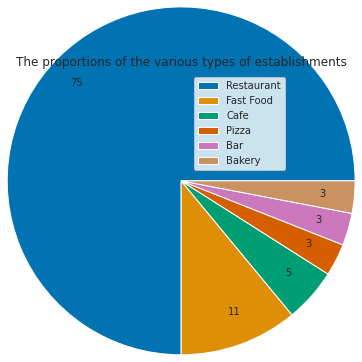

In [18]:
plt.pie(types['proportion'],labels=types['proportion'],radius=2,labeldistance=0.8),
plt.title('The proportions of the various types of establishments')
plt.legend(types['object_type'])
plt.show()


75% of establishments are restaurants, 11% are fast foods. There are few cafes, pizzas, bars and bakerys(3% each).

Let's check do these establishments belong to chains or not?

In [19]:
#Investigate the proportions of chain and nonchain establishments. Plot a graph.
chain_data = df.groupby(['chain'])['id'].nunique().reset_index()
chain_data['chain']=chain_data['chain'].apply(lambda x: 'Yes' if x==True else 'No')
chain_data

,chain,id
0,No,5972
1,Yes,3679


In [20]:
chain_data.loc[0,'chain']='nonchain'
chain_data.loc[1,'chain']='chain'

In [21]:
chain_data['percent,%']=((chain_data['id']/chain_data['id'].sum())*100).map(lambda x:int("{0:.0f}".format(x)))
chain_data

,chain,id,"percent,%"
0,nonchain,5972,62
1,chain,3679,38


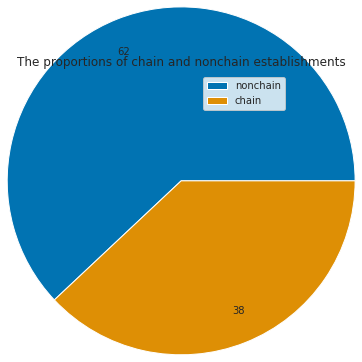

In [22]:
plt.pie(chain_data['percent,%'],labels=chain_data['percent,%'],radius=2,labeldistance=0.8),
plt.title('The proportions of chain and nonchain establishments')
plt.legend(chain_data['chain'])
plt.show()

62% of establishments belong to different chains, 38% - not. The distribution of type of chain establishments is similar to the total type distribution, the most of them are restaurants.

Let's check which type of establishment is typically a chain?

In [23]:
#Which type of establishment is typically a chain?
r=df.pivot_table(index='object_type',columns='chain',values='object_name',aggfunc='count').reset_index()
r

chain,object_type,False,True
0,Bakery,NaN,283.0
1,Bar,215.0,77.0
2,Cafe,169.0,266.0
3,Fast Food,461.0,605.0
4,Pizza,166.0,154.0
5,Restaurant,4961.0,2294.0


In [24]:
r=r.fillna(0)

In [25]:
r.columns=('object_type', 'nonchain', 'chain')

In [26]:
r['all']=r['nonchain']+r['chain']
r.sort_values(by='chain',ascending=False)

,object_type,nonchain,chain,all
5,Restaurant,4961.0,2294.0,7255.0
3,Fast Food,461.0,605.0,1066.0
0,Bakery,0.0,283.0,283.0
2,Cafe,169.0,266.0,435.0
4,Pizza,166.0,154.0,320.0
1,Bar,215.0,77.0,292.0


In [27]:
r['percent chain,%']=((r['chain']/r['all'])*100).map(lambda x:int("{0:.0f}".format(x)))
r.sort_values(by='percent chain,%',ascending=False)

,object_type,nonchain,chain,all,"percent chain,%"
0,Bakery,0.0,283.0,283.0,100
2,Cafe,169.0,266.0,435.0,61
3,Fast Food,461.0,605.0,1066.0,57
4,Pizza,166.0,154.0,320.0,48
5,Restaurant,4961.0,2294.0,7255.0,32
1,Bar,215.0,77.0,292.0,26


In [28]:
r['percent nonchain,%']=((r['nonchain']/r['all'])*100).map(lambda x:int("{0:.0f}".format(x)))
r.sort_values(by='percent nonchain,%',ascending=False)

,object_type,nonchain,chain,all,"percent chain,%","percent nonchain,%"
1,Bar,215.0,77.0,292.0,26,74
5,Restaurant,4961.0,2294.0,7255.0,32,68
4,Pizza,166.0,154.0,320.0,48,52
3,Fast Food,461.0,605.0,1066.0,57,43
2,Cafe,169.0,266.0,435.0,61,39
0,Bakery,0.0,283.0,283.0,100,0


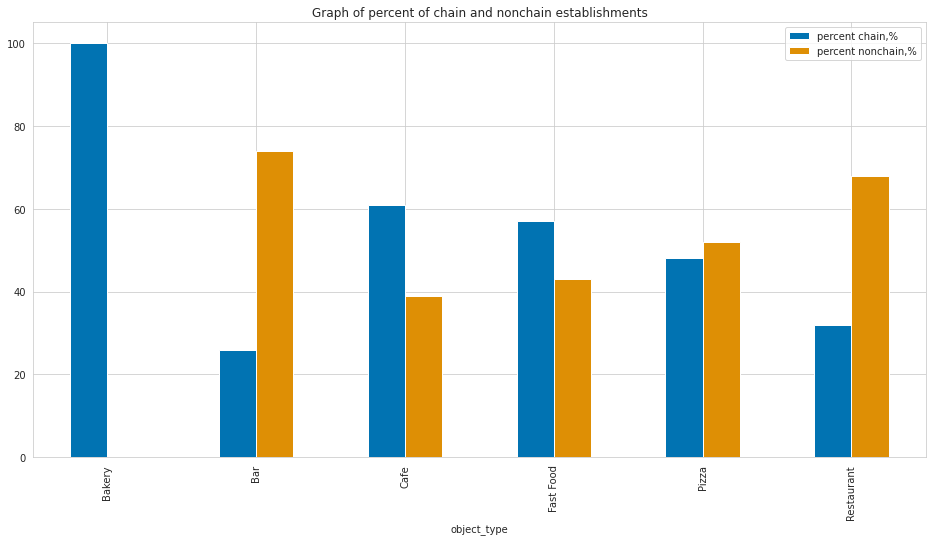

In [29]:
r[['object_type','percent chain,%','percent nonchain,%']].plot(kind='bar',figsize=(16, 8),x='object_type')
plt.title('Graph of percent of chain and nonchain establishments')
plt.show()

   Despite the fact that the majority of chain establishments in the absolute values are restaurants, but as we see from the graph above it is just because of the big total number of restaurants. In LA a percent of non chain restaurants is higher than chain restaurants as well as bars and pizzas. Cafes and Fast Food establishments are more often chain. And there are only chain bakeries in our city.

Let's check what characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [30]:
#What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
rest_grouped=df[df.chain==True].groupby(['object_name'])['number'].agg(['count','median']).reset_index()
rest_grouped.columns=['name','number_establishments','average_seating']
rest_grouped.sort_values(by='average_seating', ascending=False)

,name,number_establishments,average_seating
1573,MOUNTAINGATE COUNTRY CLUB,1,229.0
390,CHUCK E CHEESE'S #397,1,228.0
2580,USC MAIN KITCHEN-BASEMENT,1,227.0
1496,MCDONALD'S #5968,1,227.0
387,CHOSUN GALBEE RESTAURANT,1,226.0
...,...,...,...
2281,SUBWAY #44532,1,1.0
90,AURELIA'S RESTAURANT,1,1.0
1702,PANAMERICANA BAKERY,1,1.0
39,AMY'S BAKERY,1,1.0


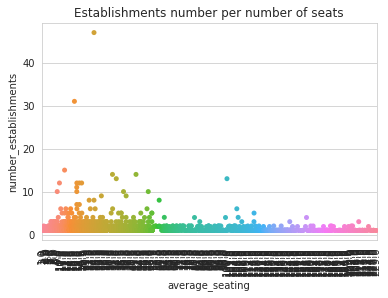

In [31]:
sns.stripplot(x='average_seating', y='number_establishments', data=rest_grouped)
plt.title('Establishments number per number of seats')
plt.xticks(rotation = 90)
plt.show()

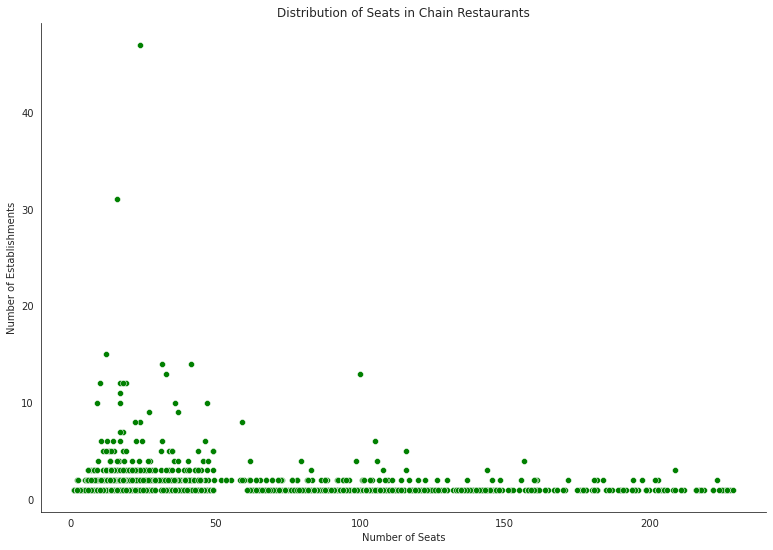

In [32]:
sns.set_style("white")
plt.figure(figsize=(13,9))
sns.scatterplot(y='number_establishments', x='average_seating', data=rest_grouped, color='green')
plt.title('Distribution of Seats in Chain Restaurants')
plt.xlabel('Number of Seats')
plt.ylabel('Number of Establishments')
sns.despine();

According to the data, chain establishments rather have a few branches with a lot of seats than many establishments with a small number of seats.

Let's determine the average number of seats for each type of restaurant. And check on average, which type of restaurant has the greatest number of seats.

In [27]:
#Determine the average number of seats for each type of restaurant. 
#On average, which type of restaurant has the greatest number of seats? Plot graphs.
seats_per_type = df.groupby(['object_type'])['number'].median().reset_index()
seats_per_type.columns=('object_type', 'average_seats')
seats_per_type['average_seats']=seats_per_type['average_seats'].map(lambda x:float("{0:.1f}".format(x)))
seats_per_type=seats_per_type.sort_values(by='average_seats', ascending=False)
seats_per_type

,object_type,average_seats
5,Restaurant,29.0
1,Bar,28.5
2,Cafe,21.0
3,Fast Food,21.0
4,Pizza,18.5
0,Bakery,18.0


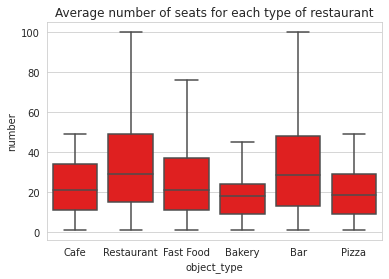

In [28]:
ax=sns.boxplot(x='object_type',y='number',data=df, showfliers=False, color='red')
plt.title('Average number of seats for each type of restaurant')
plt.show()

   The higher number of seats are in restaurants (29) and bars(28), the places where people prefer to sit, have a meal or a drink and take a rest for a while. The lower number of seats are in Pizza (18.5) and Bakery (18), where people rather get take away meals or eat fast.

   Let's study the places where our establishments are located. 

In [29]:
#Put the data on street names from the address column in a separate column.
def street(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    #this line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=str(dict_address['StreetName'])
        return clean_adress

In [30]:
df['street']=df.address.apply(street)
df

,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,PARK
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,TEMPLE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,SPRING


In [31]:
#Plot a graph of the top ten streets by number of restaurants.
top_streets=df.groupby('street')['id'].count().reset_index()
top_streets.columns=['street','amount']
top10=top_streets.sort_values(by='amount', ascending=False).head(10)
top10

,street,amount
389,SUNSET,404
440,WILSHIRE,398
337,PICO,370
432,WESTERN,369
177,FIGUEROA,334
321,OLYMPIC,309
410,VERMONT,288
298,MONICA,264
23,3RD,263
224,HOLLYWOOD,253


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Great!

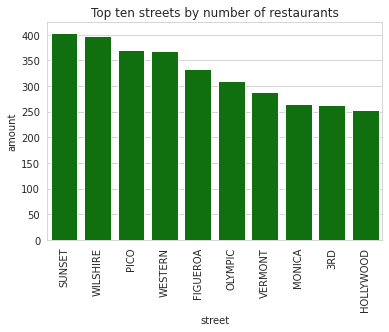

In [59]:
sns.barplot(x = 'street',
            y = 'amount', 
            data = top10, color = 'green')
sns.set_palette('colorblind') 
sns.set_style('whitegrid') 
plt.title('Top ten streets by number of restaurants')
plt.xlabel('street') 
plt.ylabel('amount')
plt.xticks(rotation = 90)
plt.show()

   We found 10 streets with the highest number of establishments. Top 3 of them: "sunset", "wilshire" and "pico" with about 400 establishments per each. The rest of the leaders are shown on the graph below.

   Let's find the number of streets that only have one restaurant.

In [33]:
#Find the number of streets that only have one restaurant
street_1_rest=top_streets[top_streets['amount']==1].count()
street_1_rest['street']

185

There are 185 streets with just 1 establishment per each.

   Let's look at the distribution of the number of seats for streets with a lot of restaurants.

In [34]:
#For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?
seats_per_street=df[df['street'].isin(top10['street'])]

In [35]:
seats_per_street[['street','number']].sort_values(by='number')

,street,number
8337,PICO,1
4972,MONICA,1
7524,PICO,1
724,3RD,1
1977,VERMONT,1
...,...,...
3332,WILSHIRE,228
8709,SUNSET,228
5091,SUNSET,229
7383,WILSHIRE,229


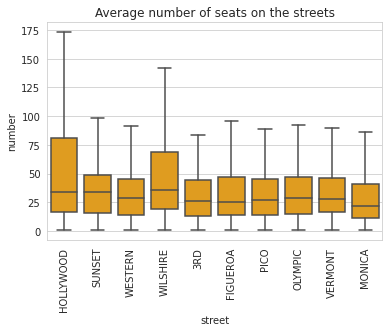

In [36]:
sns.boxplot(x='street',y='number',data=seats_per_street, showfliers=False, color='orange')
plt.xticks(rotation=90)
plt.title('Average number of seats on the streets')
plt.show()

 According to the data, the highest average number of seats have the establishments on the streets "hollywood", "wilshire",  and "sunset". Moreover, on the street "Hollywood" there are establishments with a maximum number of seats - about 175. The minimum number of seats on average on the streets "monica" and "figueroa" - about 25.

                                           Conclussion:
                                       
   So which establishment type we should choose for our future place operated by robots and how many seats should be there to be profitable? 
   
   The idea with robots is fresh, not many establishments have such service. However it should located in a crowded place, maybe on the central streets, where many people works or come to spend good time. In our city such streets are "sunset", "wilshire" and "pico". The most establishments in our city are restaurants(75%), it's not a good idea to opened new restaurant in a place where so many of them. I'd recommend open fast food, cafe or pizza. Such establishments usually have not high number of seats, the average amount is 19-25. I think it will be fine for us either.
   
   62% of establishments in our city belong to different chains, chain establishments rather have a few branches with a lot of seats than many establishments with a small number of seats. If our establishment will be quite small it is not fit to the chain model, but we can still try to do it later.
   
   This is cursory analysis with preliminary results. We need to do additional analysis of supply and demand for small cafes on these streets.

Presentation: https://docs.google.com/presentation/d/1VQtyrQDxOVLNhwUhX4JbWCaSA9pBQue-WLJ872bwEvs/edit?usp=sharing